# 4. Data Preprocessing

## 4.1 Import Libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\MD Shahbaz\OneDrive\Desktop\Technocolabs\Acme_Project\HR-Employee-Attrition.csv")

In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Data Preprocessing of data

In [4]:
data["Attrition"] = data["Attrition"].map({"Yes":1,"No":0})

In [5]:
data["Department"] = data["Department"].map({"Research & Development":2,"Sales":1,"Human Resources":0})

In [6]:
data["EducationField"] = data["EducationField"].map({"Life Sciences":5,"Medical":4,"Marketing":3,
                                            "Technical Degree":2,"Other":1,"Human Resources":0})

In [7]:
data["BusinessTravel"] = data["BusinessTravel"].map({"Travel_Frequently":1,"Travel_Rarely":2
                                                    ,"Non-Travel":0})

In [8]:
data["Gender"] = data["Gender"].map({"Female":0,"Male":1})

In [9]:
data["JobRole"] = data["JobRole"].map({"Laboratory Technician":8,"Sales Executive":7,
                                      "Research Scientist":6,"Representative":5,
                                      "Human Resources":4,"Manufacturing Director":3,
                                      "Healthcare Representative":2,"Manager":1,"Research Director":0})

In [10]:
data["MaritalStatus"] = data["MaritalStatus"].map({"Single":2,"Married":1,"Divorced":0})

In [11]:
data["OverTime"] = data["OverTime"].map({"Yes":1,"No":0})

In [12]:
data["OverTime"].unique()

array([1, 0], dtype=int64)

### Droping the columns that has Unique One

In [13]:
data.drop(columns=["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1,inplace=True)

In [90]:
data.corr()

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_65796\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,0.007652,-0.001686,0.208034,0.030912,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,-0.077351,0.077924,-0.031373,-0.062320,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.000935,-0.024469,0.000757,-0.021513,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.021959,-0.004985,-0.016806,0.023428,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.007652,-0.077351,-0.000935,0.021959,1.000000,-0.002196,-0.019636,0.253737,0.026110,0.000488,...,0.029648,-0.016154,0.015585,0.006602,0.008549,-0.075507,-0.029752,-0.009204,-0.008394,-0.002874
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,-0.002196,1.000000,0.021042,-0.006907,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,-0.019636,0.021042,1.000000,-0.031898,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.030912,-0.062320,-0.021513,0.023428,0.253737,-0.006907,-0.031898,1.000000,-0.053399,-0.017665,...,0.019442,-0.007424,0.012237,0.024003,0.008468,-0.044704,0.019506,0.016347,0.027046,0.011991
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,0.026110,-0.016075,-0.027128,-0.053399,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,0.000488,-0.001851,-0.016547,-0.017665,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


## 4.3 Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
y=data[["Attrition"]]
x=data.drop("Attrition",axis=1)

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=35)

In [94]:
## this is the fucntion to get rid with multi colinearity problem 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [95]:
corr_features = correlation(x_train, .75)

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_65796\3844255012.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [96]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [97]:
## we are removing this feature basically it has identitcal corr-relation values 
df = data.drop(corr_features,axis=1)

In [98]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,1,1,2,5,2,0,...,19479,8,1,11,1,0,0,1,6,0
1,49,0,1,279,2,8,1,5,3,1,...,24907,1,0,23,4,1,3,3,10,1
2,37,1,2,1373,2,2,2,1,4,1,...,2396,6,1,15,2,0,3,3,0,0
3,33,0,1,1392,2,3,4,5,4,0,...,23159,1,1,11,3,0,3,3,8,3
4,27,0,2,591,2,2,1,4,1,1,...,16632,9,0,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,2,23,2,4,3,1,...,12290,4,0,17,3,1,3,3,5,0
1466,39,0,2,613,2,6,1,4,4,1,...,21457,4,0,15,1,1,5,3,7,1
1467,27,0,2,155,2,4,3,5,2,1,...,5174,1,1,20,2,1,0,3,6,0
1468,49,0,1,1023,1,2,3,4,4,1,...,13243,2,0,14,4,0,3,2,9,0


# 4.4 Feature scaling Applying Standardization

In [100]:
def scaler_standard(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    return x_train_scaled, x_test_scaled

In [101]:
x_train_scaled,x_test_scaled = scaler_standard(x_train,x_test)

## 5. Model Selection For Classification

#### 5.1 Import Libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# 5.2 Logistic Regression

In [103]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(x_train_scaled,y_train)
loreg_pred = loreg.predict(x_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.8859
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       318
           1       0.61      0.44      0.51        50

    accuracy                           0.89       368
   macro avg       0.76      0.70      0.72       368
weighted avg       0.87      0.89      0.88       368



c:\users\md shahbaz\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

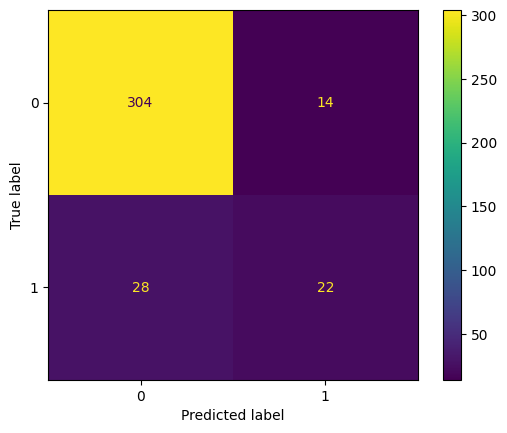

In [104]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, x_test_scaled, y_test)

## 5.3 Decision Tree

In [107]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
dtc_pred = dtc.predict(x_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.8098
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       318
           1       0.35      0.48      0.41        50

    accuracy                           0.81       368
   macro avg       0.63      0.67      0.65       368
weighted avg       0.84      0.81      0.82       368



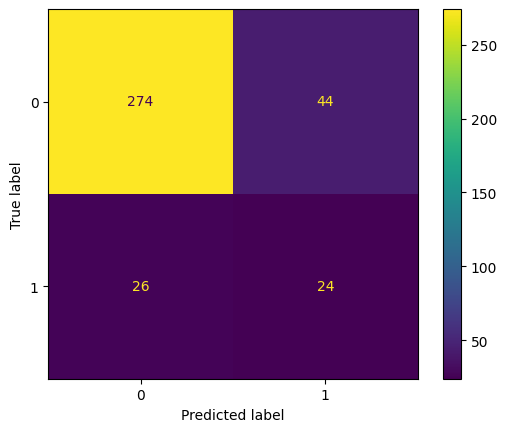

In [108]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, x_test_scaled, y_test)

# 5.4 Random Forest

In [111]:
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled,y_train)
rfc_pred = rfc.predict(x_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_65796\3785910619.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_scaled,y_train)


Random Forest
Accuracy Score value: 0.8750
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       318
           1       0.64      0.18      0.28        50

    accuracy                           0.88       368
   macro avg       0.76      0.58      0.61       368
weighted avg       0.85      0.88      0.84       368



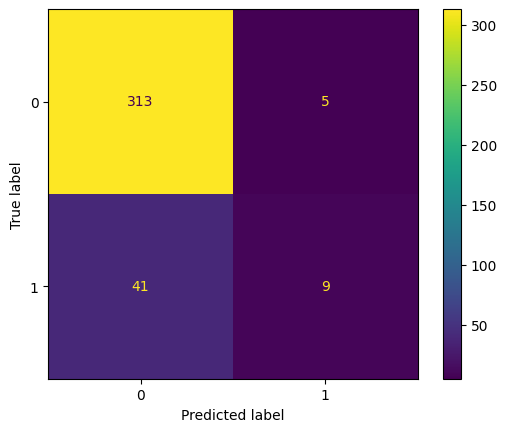

In [113]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, x_test_scaled, y_test)

## 5.5 K_Neighbors Classifier

In [114]:
# KNeighborsClassifier to Train from SKlearn
knnc = RandomForestClassifier()
knnc.fit(x_train_scaled,y_train)
knn_pred = knnc.predict(x_test_scaled)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

C:\Users\MD Shahbaz\AppData\Local\Temp\ipykernel_65796\2800670929.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  knnc.fit(x_train_scaled,y_train)


KNeighbors Classifier
Accuracy Score value: 0.8859
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       318
           1       0.83      0.20      0.32        50

    accuracy                           0.89       368
   macro avg       0.86      0.60      0.63       368
weighted avg       0.88      0.89      0.85       368



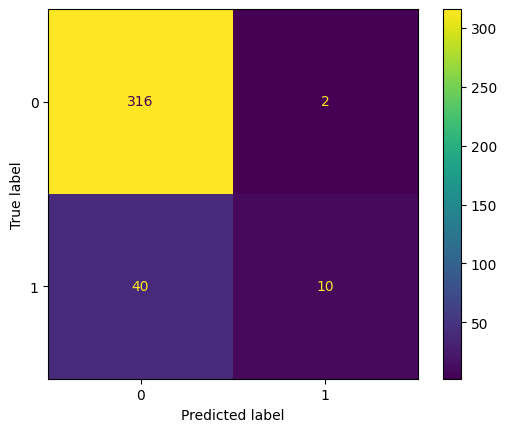

In [115]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, x_test_scaled, y_test)

## 5.6 XGboost Model

In [127]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(x_train_scaled,y_train)
xgb_pred = xgb.predict(x_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.8832
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       318
           1       0.60      0.42      0.49        50

    accuracy                           0.88       368
   macro avg       0.76      0.69      0.71       368
weighted avg       0.87      0.88      0.87       368



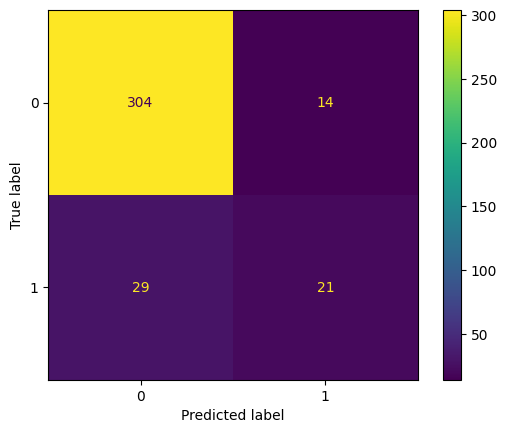

In [129]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, x_test_scaled, y_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 88.97 % |
| Logistic Regression Accurracy  | 88.59 % |
| KNeighbors Classifier  | 88.59 %|
| Random Forest Classifier  | 87.50 % |
| Decision Tree Classifier  | 80.98 % |

## 6.8 HyperParameter Tuning

In [130]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(x_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=2.525252525252525,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(x_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(x_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.8832
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       318
           1       0.09      0.18      0.12        50

    accuracy                           0.65       368
   macro avg       0.47      0.45      0.45       368
weighted avg       0.75      0.65      0.69       368

